In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from fastai.collab import CollabDataBunch, collab_learner
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
movies = pd.read_csv('/content/drive/My Drive/FinalYearProj-2020/DataSets/Movielens/movies.csv')
ratings = pd.read_csv('/content/drive/My Drive/FinalYearProj-2020/DataSets/Movielens/ratings.csv')

In [0]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
data=CollabDataBunch.from_df(ratings, valid_pct=0.1)
data.show_batch()

userId,movieId,target
469,2253,4.0
199,267,1.5
64,3994,4.0
298,65642,4.0
402,667,3.0


In [0]:
learn=collab_learner(data, n_factors=40, y_range=[0,5.5], wd=0.1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


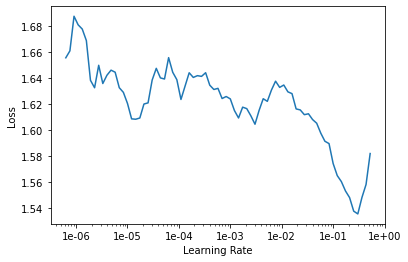

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
print(5e-02)

0.05


In [0]:
learn.fit_one_cycle(5,5e-02)

epoch,train_loss,valid_loss,time
0,1.076295,1.153350,00:15
1,1.279665,1.317087,00:17
2,1.065207,1.061278,00:17
3,0.819203,0.804349,00:16
4,0.549351,0.751920,00:15


In [0]:
(users, items), rating = next(iter(data.valid_dl))
predictions = learn.model(users, items)
difference=[]
print('ActualRating\tPredictedRating\tDifference')
for p in list(zip(rating, predictions)):
  # accuracy.append(abs(100-(abs(p[1]-p[0])/p[0])*100))
  difference.append(abs(p[1]-p[0]))
  print('{}\t\t{:.1f}\t\t{:.1f}'.format(p[0],p[1],abs(p[1]-p[0])))

ActualRating	PredictedRating	Difference
3.0		3.1		0.1
2.5		2.9		0.4
3.5		4.4		0.9
3.5		3.2		0.3
3.0		3.4		0.4
4.5		4.1		0.4
4.0		3.8		0.2
2.5		3.5		1.0
3.0		3.1		0.1
1.5		3.2		1.7
3.5		3.8		0.3
4.5		3.5		1.0
4.5		4.1		0.4
5.0		4.3		0.7
4.5		3.2		1.3
4.0		4.0		0.0
0.5		2.6		2.1
3.5		3.5		0.0
3.0		3.9		0.9
4.0		3.6		0.4
4.0		3.3		0.7
3.0		4.1		1.1
3.5		3.8		0.3
3.0		3.3		0.3
3.5		3.8		0.3
3.5		3.0		0.5
3.0		4.3		1.3
3.0		3.6		0.6
4.0		4.2		0.2
3.0		3.1		0.1
3.0		2.8		0.2
4.5		4.1		0.4
1.5		2.5		1.0
3.5		3.3		0.2
4.0		3.1		0.9
3.0		3.6		0.6
4.5		4.3		0.2
4.0		2.8		1.2
3.0		3.5		0.5
3.0		3.7		0.7
5.0		4.1		0.9
4.0		4.2		0.2
3.0		3.1		0.1
4.0		3.6		0.4
3.5		3.2		0.3
3.0		2.5		0.5
4.0		3.6		0.4
2.0		3.3		1.3
3.0		3.4		0.4
2.0		2.8		0.8
3.0		2.9		0.1
5.0		3.5		1.5
4.0		3.8		0.2
5.0		3.2		1.8
3.0		3.3		0.3
2.5		2.8		0.3
2.5		3.1		0.6
3.0		3.3		0.3
5.0		3.6		1.4
3.5		4.0		0.5
1.5		2.1		0.6
3.5		3.6		0.1
4.0		3.2		0.8
3.0		3.2		0.2


In [0]:
print(predictions)

tensor([3.7582, 3.2767, 3.1607, 2.7357, 3.7543, 3.4138, 3.6118, 2.7011, 3.3476,
        4.0247, 3.8461, 3.1929, 3.8022, 3.9469, 3.2110, 4.7429, 3.7611, 3.7904,
        2.7788, 3.9789, 4.2787, 3.5746, 3.9082, 3.0471, 3.5366, 1.8150, 4.4577,
        3.3229, 2.7833, 2.1783, 1.9918, 3.3276, 2.9547, 2.7726, 3.0152, 3.9411,
        3.6586, 3.1130, 3.5066, 2.4219, 2.7360, 3.5650, 2.3356, 2.6527, 3.4527,
        4.1178, 3.1566, 3.4274, 3.3136, 3.8534, 2.7769, 3.2815, 2.7534, 3.5181,
        3.4775, 3.1375, 3.2345, 3.6864, 2.8098, 3.2603, 3.6738, 3.5671, 1.8864,
        3.1817], grad_fn=<AddBackward0>)


In [0]:
print(users)

tensor([594, 317, 415, 385, 141, 177, 555, 292, 600, 563, 352, 260, 304, 380,
        346, 474,   6, 550, 107, 103, 351,  18,  61, 555, 226, 386,  45, 186,
        599, 580, 325, 590, 606, 177, 307, 186,  17, 122, 339, 560, 210, 380,
        219, 304, 169, 344, 292, 477, 610, 594, 590, 484, 284, 239,  72, 469,
        390, 603,  82, 117, 219, 559, 282, 273])


In [0]:
c=0
for i in difference:
  if i>0.5:
    continue
  else:
    c+=1
accuracy=(c/len(difference))*100
print(accuracy)

54.6875


epoch=5, learning rate=0.05, n_factors=40
0.5--60%
0.6--65.625%
0.7--73.4375%



In [0]:
len(users)

64

In [0]:
len(difference)

20